## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $MVN(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*


1. Posterior for $\boldsymbol\beta$
- **Likelihood:**  
  $
  p(\mathbf{y}|\boldsymbol\beta,\sigma^2,\mathbf{X}) \propto \exp\!\left\{-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol\beta)^\top(\mathbf{y}-\mathbf{X}\boldsymbol\beta)\right\}.
  $

- **Prior:**  
  $
  \boldsymbol\beta \sim MVN(\boldsymbol\beta_0,\, \boldsymbol\Sigma_\beta).
  $

- **Posterior (up to proportionality):**  
  $
  p(\boldsymbol\beta|\mathbf{y},\mathbf{X},\sigma^2) \propto \exp\!\left\{-\frac{1}{2}\left[\boldsymbol\beta^\top\left(\frac{\mathbf{X}^\top\mathbf{X}}{\sigma^2}+\boldsymbol\Sigma_\beta^{-1}\right)\boldsymbol\beta -2\boldsymbol\beta^\top\left(\frac{\mathbf{X}^\top\mathbf{y}}{\sigma^2}+\boldsymbol\Sigma_\beta^{-1}\boldsymbol\beta_0\right)\right]\right\}
  $

- **Completing the square:**  
  Let's break down the "completing the square" step in detail. Our goal is to rewrite the quadratic form in the exponent so that it looks like a multivariate normal density in $\boldsymbol\beta$.

  Let $
  \mathbf{A} = \frac{\mathbf{X}^\top \mathbf{X}}{\sigma^2} + \boldsymbol\Sigma_\beta^{-1},
  $ and $
  \mathbf{b} = \frac{\mathbf{X}^\top\mathbf{y}}{\sigma^2} + \boldsymbol\Sigma_\beta^{-1}\boldsymbol\beta_0
  $

  Then, the exponent becomes:$
  -\frac{1}{2}\left[\boldsymbol\beta^\top \mathbf{A} \boldsymbol\beta - 2 \boldsymbol\beta^\top \mathbf{b}\right]
  $

  We want to express $
  \boldsymbol\beta^\top \mathbf{A} \boldsymbol\beta - 2 \boldsymbol\beta^\top \mathbf{b}
  $ in the form of a completed square.
  
  For a quadratic form, we have the identity:

  $
  \boldsymbol\beta^\top \mathbf{A} \boldsymbol\beta - 2\boldsymbol\beta^\top \mathbf{b} = (\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b}) - \mathbf{b}^\top \mathbf{A}^{-1} \mathbf{b}
  $

  Plugging this back, the exponent becomes:

  $
  -\frac{1}{2}\left[(\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b}) - \mathbf{b}^\top \mathbf{A}^{-1}\mathbf{b}\right]
  $

  We can split this into:

  $
  -\frac{1}{2}(\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b}) + \frac{1}{2}\mathbf{b}^\top \mathbf{A}^{-1}\mathbf{b}
  $

  Notice that the term

  $
  \exp\!\left\{-\frac{1}{2}(\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol\beta - \mathbf{A}^{-1}\mathbf{b})\right\}
  $

  is the kernel of a multivariate normal distribution with mean $\mathbf{A}^{-1}\mathbf{b}$ and covariance matrix $\mathbf{A}^{-1}$. The term

  $
  \exp\!\left\{\frac{1}{2}\mathbf{b}^\top \mathbf{A}^{-1}\mathbf{b}\right\}
  $

  does not depend on $\boldsymbol\beta$ and is absorbed into the normalization constant.

  Thus, after completing the square, you can conclude that

  $
  \boldsymbol\beta \mid \mathbf{y},\mathbf{X},\sigma^2 \sim MVN\Bigl(\mathbf{A}^{-1}\mathbf{b},\, \mathbf{A}^{-1}\Bigr),
  $

  then the posterior is:

  $
  \boldsymbol\beta|\mathbf{y},\mathbf{X},\sigma^2 \sim MVN\Bigl(\mathbf{A}^{-1}\Bigl(\frac{\mathbf{X}^\top\mathbf{y}}{\sigma^2}+\boldsymbol\Sigma_\beta^{-1}\boldsymbol\beta_0\Bigr),\, \mathbf{A}^{-1}\Bigr)
  $

---

2. Posterior for $\sigma^2$

- **Likelihood (given $\boldsymbol\beta$):**  
  $
  p(\mathbf{y}|\boldsymbol\beta,\sigma^2,\mathbf{X}) \propto (\sigma^2)^{-n/2} \exp\!\left\{-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol\beta)^\top(\mathbf{y}-\mathbf{X}\boldsymbol\beta)\right\}
 $

- **Prior:**  
  $
  \sigma^2 \sim \text{IG}(\alpha^*,\,\beta^*), \quad p(\sigma^2) \propto (\sigma^2)^{-\alpha^*-1}\exp\!\left\{-\frac{\beta^*}{\sigma^2}\right\}
  $

- **Posterior (up to proportionality):**  
  $
  p(\sigma^2|\mathbf{y},\mathbf{X},\boldsymbol\beta) \propto (\sigma^2)^{-n/2} \cdot (\sigma^2)^{-\alpha^*-1} \exp\!\left\{-\frac{1}{\sigma^2}\left[\frac{1}{2}(\mathbf{y}-\mathbf{X}\boldsymbol\beta)^\top(\mathbf{y}-\mathbf{X}\boldsymbol\beta)+\beta^*\right]\right\}
  $

  Combining the exponents:

  $
  p(\sigma^2|\cdot) \propto (\sigma^2)^{-\left(\alpha^*+\frac{n}{2}+1\right)} \exp\!\left\{-\frac{1}{\sigma^2}\left[\beta^*+\frac{1}{2}(\mathbf{y}-\mathbf{X}\boldsymbol\beta)^\top(\mathbf{y}-\mathbf{X}\boldsymbol\beta)\right]\right\}
  $

- **Result:**  
  $
  \sigma^2|\mathbf{y},\mathbf{X},\boldsymbol\beta \sim \text{IG}(\alpha^*+\frac{n}{2},\, \beta^*+\frac{1}{2}(\mathbf{y}-\mathbf{X}\boldsymbol\beta)^\top(\mathbf{y}-\mathbf{X}\boldsymbol\beta))
  $

  This is the standard conjugate inverse-gamma posterior for the variance parameter in a normal linear model.




### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma`
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
# Data Loading and Preparation
data = load_diabetes()
X = data.data
y = data.target

# Add intercept term
X = np.column_stack([np.ones(X.shape[0]), X])
n, p = X.shape

# Standardize predictors (except intercept)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

In [3]:
# MCMC Setup
n_iter = 5000
burn_in = 1500

# Arrays to store samples
betas_samples = np.zeros((n_iter, p))
sigma_samples = np.zeros(n_iter)

# Initial values
sigma_current = 1.0
betas_current = np.zeros(p)

# Precompute quantities used in beta conditional:
XtX = np.dot(X.T, X)
Xty = np.dot(X.T, y)

In [4]:
def sample_beta(sigma):
    """
    Draws beta from its conditional posterior:
      beta | sigma, y ~ N(mean, cov)

    """
    cov_beta = np.linalg.inv(XtX / (sigma**2) + np.eye(p))
    mean_beta = cov_beta.dot(Xty / (sigma**2))
    return np.random.multivariate_normal(mean_beta, cov_beta)

def log_sigma_posterior(sigma, beta):
    """
    Log posterior for sigma given beta (ignoring constant terms):
      p(sigma|beta,y) ∝ (1/sigma)^n exp(-S/(2 sigma^2)) * exp(-sigma^2/2)
    where S = sum((y - X beta)^2) and sigma > 0.
    """
    if sigma <= 0:
        return -np.inf
    residuals = y - X.dot(beta)
    S = np.sum(residuals**2)
    return -n * np.log(sigma) - S/(2*sigma**2) - sigma**2/2


In [5]:
# MCMC Loop: Gibbs for beta and Metropolis for sigma
sigma_proposal_std = 0.1  # tuning parameter for sigma proposals
accepted = 0

for i in range(n_iter):
    # Sample beta given current sigma (conditionally conjugate)
    betas_current = sample_beta(sigma_current)
    betas_samples[i, :] = betas_current

    # Propose a new sigma using a random-walk (additive Gaussian proposal)
    sigma_proposal = sigma_current + np.random.normal(0, sigma_proposal_std)
    # Reject proposals that are not positive
    if sigma_proposal <= 0:
        sigma_samples[i] = sigma_current
        continue

    # Compute acceptance ratio for sigma
    log_alpha = log_sigma_posterior(sigma_proposal, betas_current) - log_sigma_posterior(sigma_current, betas_current)
    if np.log(np.random.rand()) < log_alpha:
        sigma_current = sigma_proposal
        accepted += 1
    sigma_samples[i] = sigma_current

print("Acceptance rate for sigma update:", accepted / n_iter)

# Discard burn-in samples
betas_samples = betas_samples[burn_in:]
sigma_samples = sigma_samples[burn_in:]

Acceptance rate for sigma update: 0.8274


In [6]:
# Posterior Summaries
beta_mean = betas_samples.mean(axis=0)
sigma_mean = sigma_samples.mean()

print("Posterior mean for betas:", beta_mean)
print("Posterior mean for sigma:", sigma_mean)

Posterior mean for betas: [20.11972462  1.18837165 -0.22514484  4.95903051  3.58441353  1.12343334
  0.72494439 -3.04041501  2.99993039  4.56518074  2.74896678]
Posterior mean for sigma: 53.8733688288767


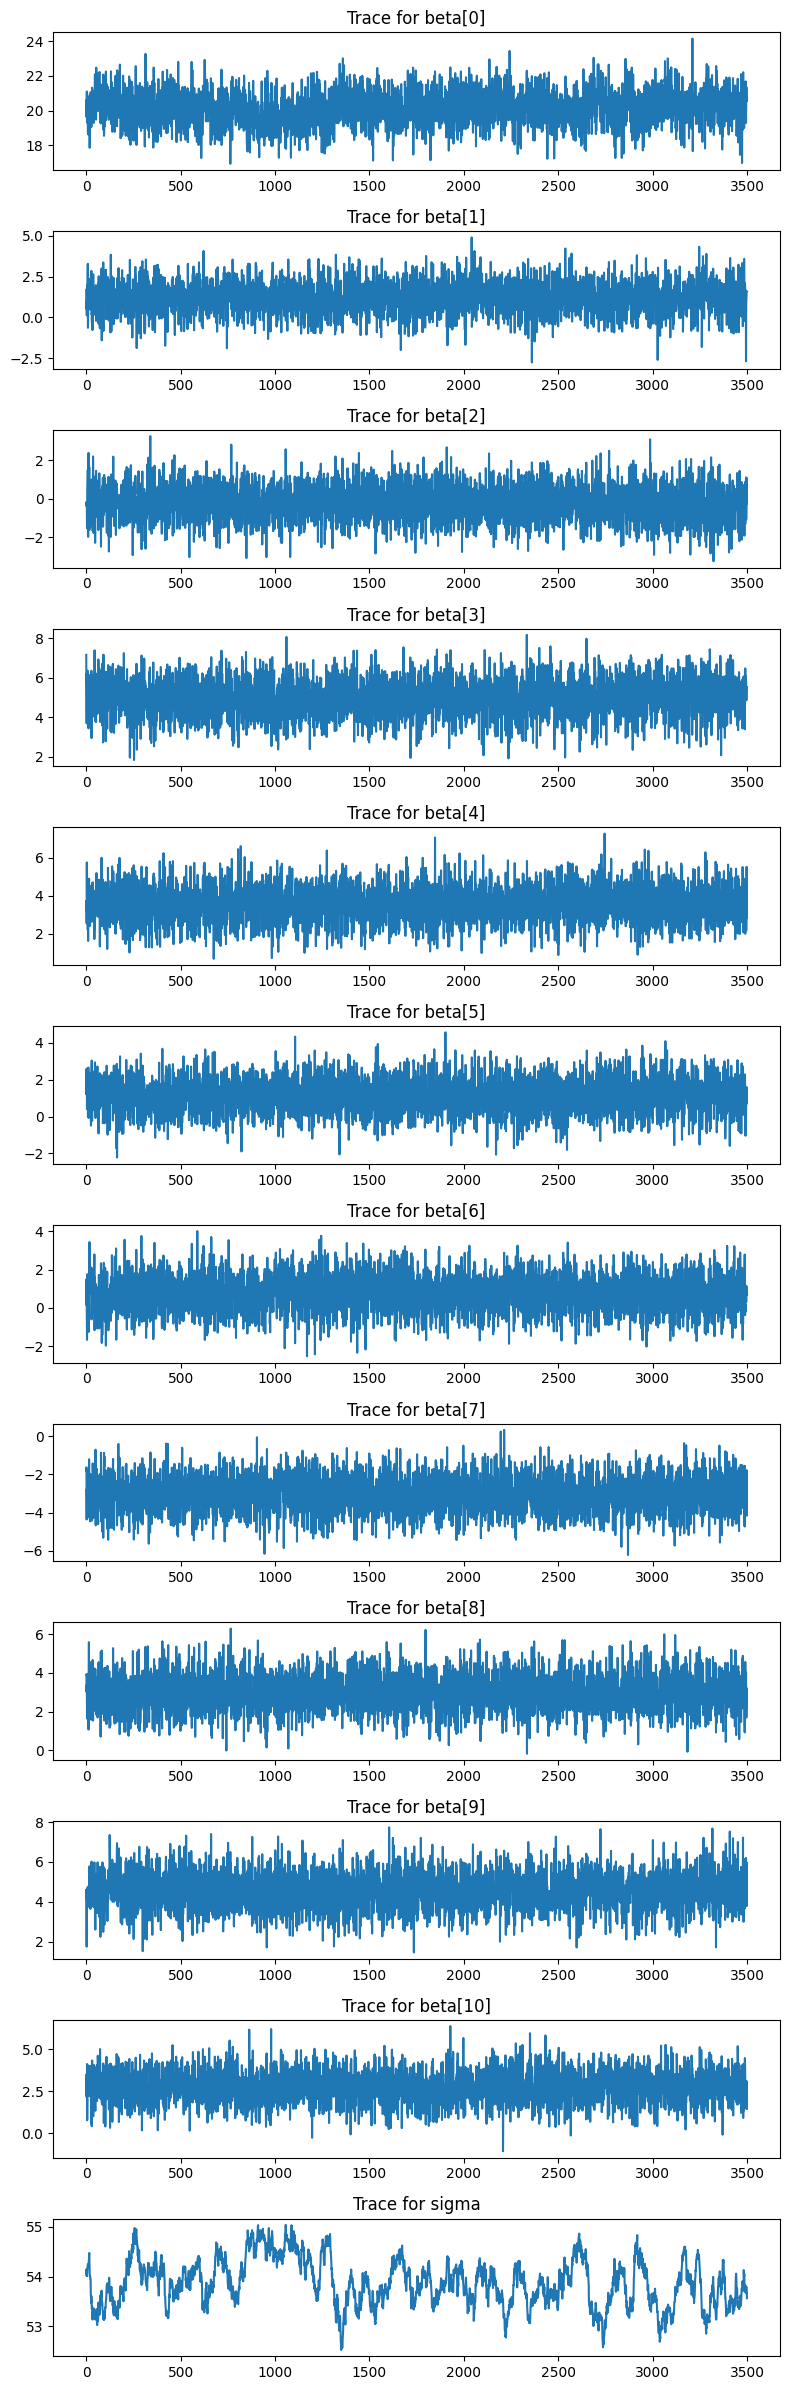

In [7]:
# MCMC Diagnostics: Trace Plots
fig, axs = plt.subplots(p+1, 1, figsize=(8, 2*(p+1)))
for j in range(p):
    axs[j].plot(betas_samples[:, j])
    axs[j].set_title(f"Trace for beta[{j}]")
axs[p].plot(sigma_samples)
axs[p].set_title("Trace for sigma")
plt.tight_layout()
plt.show()

The chains for these betas look stable and remain within consistent ranges across iterations.

The chain for sigma also remains within a consisten range from around 53 to 55 with no significant deviation.

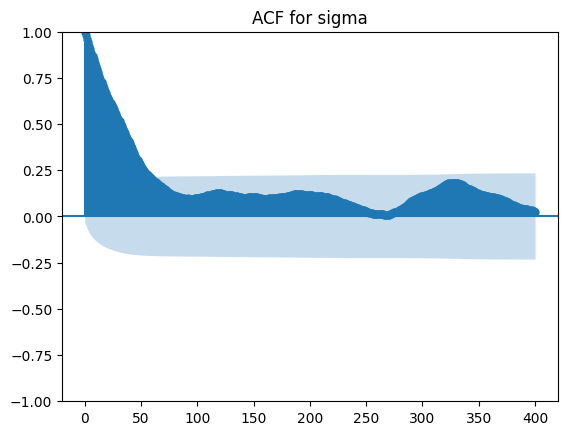

In [9]:
# Autocorrelation for sigma
plot_acf(sigma_samples, lags=400)
plt.title("ACF for sigma")
plt.show()

The autocorrelation starts close to 1 (as all ACF plots do at lag 0) but drops quickly within the first 50–100 lags to values near or below 0. Past around lag 100, the ACF hovers around zero and occasionally dips slightly positive or negative. These fluctuations remain within or close to the confidence band, so there’s no strong evidence of persistent long-range correlation.

Because the correlation is low for lags beyond ~50, the chain will have a larger effective sample size for $\sigma$. So we do not need nearly as many iterations to achieve a given level of precision in the posterior estimate.


### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $N(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$.

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers"
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim MVN(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?





In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.special import gammaln
from statsmodels.graphics.tsaplots import plot_acf

In [17]:
# Data: Load, preprocess, and add outliers
data = load_diabetes()
X = data.data
y = data.target.astype(float)

# Add intercept column
X = np.column_stack([np.ones(X.shape[0]), X])
n, p = X.shape

# Standardize predictors (except the intercept)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Introduce outliers: randomly select 10% of observations and add a large noise
np.random.seed(42)
n_out = int(0.1 * n)
outlier_indices = np.random.choice(n, n_out, replace=False)
y[outlier_indices] += 20 * np.std(y)

print("Outlier indices:", outlier_indices)

Outlier indices: [287 211  72 321  73 418 367 354 281 148 429  78 126 113 329 427 172 268
  76 116   9 181  55 399  30 140 341 209 436 132 407  79  39 333 311 422
  75 157 307 370  70 227 284 402]


In [18]:
# MCMC Settings and Prior Hyperparameters
n_iter = 5000
burn_in = 1000

# Priors:
# β ~ N(0,1) independently
# τ ~ Gamma(a0, b0)
a0, b0 = 1.0, 1.0

# Prior on degrees-of-freedom v: Uniform(2,50)
v_lower, v_upper = 2, 50

# Proposal standard deviation for v update (Metropolis step)
v_prop_std = 1.0


In [19]:
# Initialize arrays to store samples
beta_samples = np.zeros((n_iter, p))
tau_samples = np.zeros(n_iter)
tau_i_samples = np.zeros((n_iter, n))
v_samples = np.zeros(n_iter)
hat_samples = np.zeros((n_iter, n))

# Initialize parameters:
beta_current = np.zeros(p)
tau_current = 1.0
tau_i_current = np.ones(n)
v_current = 5.0

# To track acceptance for v
v_accept = 0

# Precompute quantities for Beta sampling
XtX = X.T.dot(X)
Xty = X.T.dot(y)


In [20]:
# MCMC Sampler Loop
for it in range(n_iter):
    # --- 1. Sample β given {tau, tau_i}
    # Likelihood weights: w_i = tau * tau_i
    w = tau_current * tau_i_current  # vector length n
    # Posterior covariance for β: (Xᵀ W X + I)^(-1)
    A = X.T.dot(np.diag(w)).dot(X) + np.eye(p)
    cov_beta = np.linalg.inv(A)
    # Posterior mean: (Xᵀ W X + I)^(-1) (Xᵀ W y)
    mean_beta = cov_beta.dot(X.T.dot(np.diag(w)).dot(y))
    beta_current = np.random.multivariate_normal(mean_beta, cov_beta)

    # --- 2. Sample tau given beta and {tau_i}
    residuals = y - X.dot(beta_current)
    shape_tau = a0 + n/2
    rate_tau = b0 + 0.5 * np.sum(tau_i_current * residuals**2)
    # np.random.gamma takes shape and scale=1/rate
    tau_current = np.random.gamma(shape_tau, 1.0 / rate_tau)

    # --- 3. Sample each tau_i given beta, tau, v
    for i in range(n):
        # For observation i:
        # τ_i ~ Gamma((v+1)/2, (v + τ*(residual)^2)/2)
        shape_tau_i = (v_current + 1) / 2.0
        rate_tau_i = (v_current + tau_current * residuals[i]**2) / 2.0
        tau_i_current[i] = np.random.gamma(shape_tau_i, 1.0 / rate_tau_i)

    # --- 4. Sample v (degrees-of-freedom) via Metropolis step ---
    v_proposal = v_current + np.random.normal(0, v_prop_std)
    if v_proposal < v_lower or v_proposal > v_upper:
        v_new = v_current  # reject if outside allowed range
    else:
        # Compute log posterior for v given current tau_i's
        # For each observation, the density for tau_i is:
        # p(tau_i|v) \prop (v/2)^(v/2)/Γ(v/2) * tau_i^(v/2 - 1) exp(- (v/2) * tau_i)
        log_post_current = np.sum((v_current/2)*np.log(v_current/2) -
                                  gammaln(v_current/2) +
                                  ((v_current/2) - 1)*np.log(tau_i_current) -
                                  (v_current/2)*tau_i_current)
        log_post_proposal = np.sum((v_proposal/2)*np.log(v_proposal/2) -
                                   gammaln(v_proposal/2) +
                                   ((v_proposal/2) - 1)*np.log(tau_i_current) -
                                   (v_proposal/2)*tau_i_current)
        log_alpha = log_post_proposal - log_post_current
        if np.log(np.random.rand()) < log_alpha:
            v_new = v_proposal
            v_accept += 1
        else:
            v_new = v_current
    v_current = v_new

    # --- Store current samples ---
    beta_samples[it, :] = beta_current
    tau_samples[it] = tau_current
    tau_i_samples[it, :] = tau_i_current
    v_samples[it] = v_current

    # --- 5. Compute the weighted hat matrix diagonal ---
    # Form the weighted design matrix: W_half = sqrt(tau * tau_i)
    W_half = np.sqrt(w)
    Xw = W_half[:, None] * X
    A_mat = Xw.T.dot(Xw)
    try:
        A_inv = np.linalg.inv(A_mat)
    except np.linalg.LinAlgError:
        A_inv = np.linalg.pinv(A_mat)
    H = Xw.dot(A_inv).dot(Xw.T)
    hat_samples[it, :] = np.diag(H)

In [21]:
# Post-processing: Discard burn-in and summarize
beta_samples = beta_samples[burn_in:]
tau_samples = tau_samples[burn_in:]
tau_i_samples = tau_i_samples[burn_in:]
v_samples = v_samples[burn_in:]
hat_samples = hat_samples[burn_in:]
print("Final acceptance rate for v:", v_accept / n_iter)

# Posterior means for β and v
beta_mean = beta_samples.mean(axis=0)
v_mean = v_samples.mean()
print("Posterior mean for beta:", beta_mean)
print("Posterior mean for v:", v_mean)

Final acceptance rate for v: 0.0428
Posterior mean for beta: [ 1.90805214  0.0618918  -0.05249231  0.22094249  0.16017337  0.08147096
  0.09936156 -0.19477967  0.22015634  0.25927073  0.15660611]
Posterior mean for v: 2.064407879058267


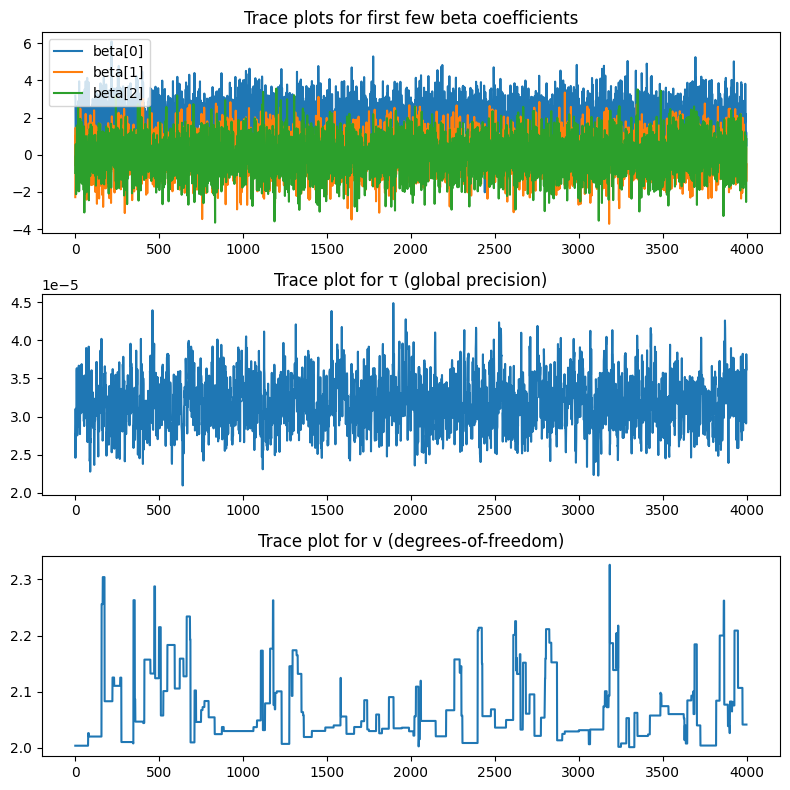

In [22]:
# MCMC Diagnostics: Trace plots for select parameters
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
# Plot the first three beta coefficients (if available)
for j in range(min(3, p)):
    axs[0].plot(beta_samples[:, j], label=f'beta[{j}]')
axs[0].set_title("Trace plots for first few beta coefficients")
axs[0].legend()

axs[1].plot(tau_samples)
axs[1].set_title("Trace plot for τ (global precision)")

axs[2].plot(v_samples)
axs[2].set_title("Trace plot for v (degrees-of-freedom)")

plt.tight_layout()
plt.show()

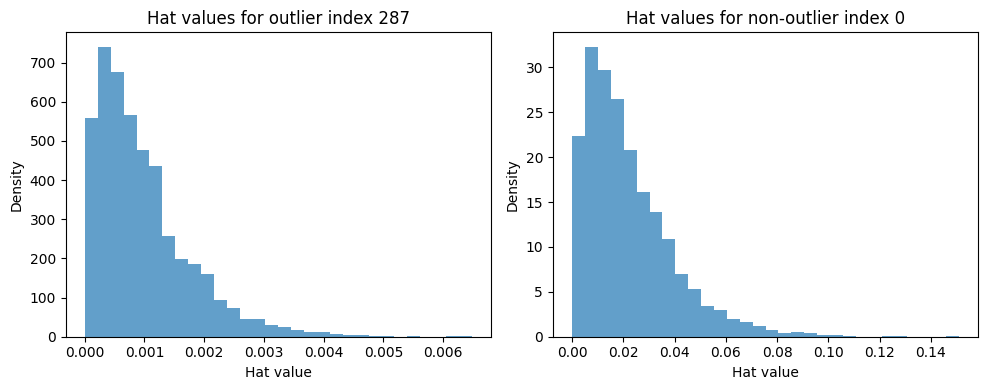

In [24]:
# Examine Influence (hat values) for outlier vs non-outlier points
outlier_idx = outlier_indices[0]
nonoutlier_idx = [i for i in range(n) if i not in outlier_indices][0]

hat_outlier = hat_samples[:, outlier_idx]
hat_nonoutlier = hat_samples[:, nonoutlier_idx]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(hat_outlier, bins=30, density=True, alpha=0.7)
plt.title(f"Hat values for outlier index {outlier_idx}")
plt.xlabel("Hat value")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(hat_nonoutlier, bins=30, density=True, alpha=0.7)
plt.title(f"Hat values for non-outlier index {nonoutlier_idx}")
plt.xlabel("Hat value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()



In [25]:
# Print summary statistics for the hat values
print("Outlier hat value summary:")
print(pd.Series(hat_outlier).describe())
print("\nNon-outlier hat value summary:")
print(pd.Series(hat_nonoutlier).describe())

Outlier hat value summary:
count    4000.000000
mean        0.000982
std         0.000800
min         0.000006
25%         0.000404
50%         0.000773
75%         0.001317
max         0.006479
dtype: float64

Non-outlier hat value summary:
count    4000.000000
mean        0.022082
std         0.017252
min         0.000007
25%         0.009206
50%         0.017948
75%         0.030721
max         0.150923
dtype: float64
